##Guía 1 Visión

---



Ezequiel Vijande

Lucero Guadalupe Fernandez


###Ejercicio 4

(-0.5, 2.5, 2.5, -0.5)

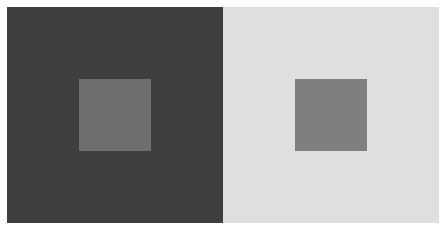

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

center_ = 110
center_l = (center_, center_, center_)
center_r = (127, 127, 127)
dark = (63,63,63)
light = (223,223,223)

img_one = [[dark, dark, dark],
          [dark, center_l, dark],
          [dark, dark, dark]]

img_two = [[light, light, light],
          [light, center_r, light],
          [light, light, light]]

#las ploteamos al lado
f = plt.figure()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
f.add_subplot(1,2, 1)
plt.imshow(img_one)
plt.axis('off')
f.add_subplot(1,2, 2)
plt.imshow(img_two)
plt.axis('off')

COnclusiones:

###Ejercicio 5

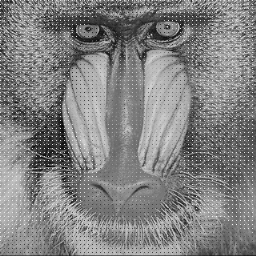

In [ ]:
from IPython.display import Image
Image('mono.png')

In [ ]:
import cv2

#hay que subir la imagen 'mono.png' si bien la original esta en formato .bmp, google colab no acepta bmp por eso la guard
img = cv2.imread('mono.png')
height, width, channels = img.shape

In [ ]:
img.shape

(256, 256, 3)

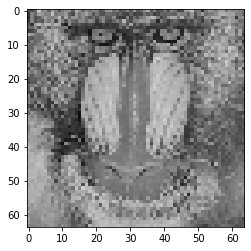

In [ ]:
item_a = np.zeros(shape = (64,64,3), dtype=int)
step = 4
x_pos = 1
y_pos = 1
for row in range(0, width, step):
  for col in range(0, height, step):
    new_pixel = img[row+x_pos, col+y_pos]
    item_a[row//step, col//step] = new_pixel

plt.imshow(item_a)

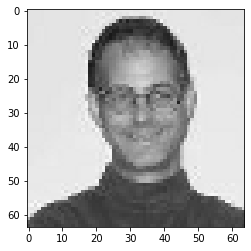

In [ ]:
item_b = np.zeros(shape = (64,64,3), dtype=int)
step = 4
x_pos = 0
y_pos = 0
for row in range(0, width, step):
  for col in range(0, height, step):
    new_pixel = img[row+x_pos, col+y_pos]
    item_b[row//step, col//step] = new_pixel

plt.imshow(item_b)

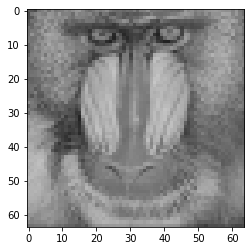

In [ ]:
item_c = np.zeros(shape = (64,64,3), dtype=int)
step = 4
for row in range(0, width, step):
  for col in range(0, height, step):
    new_pixel = np.mean(img[row:row+step, col:col+step])
    item_c[row//step, col//step] = new_pixel

plt.imshow(item_c)

#### item d

In [ ]:
import numpy as np

def FiniteDifference(prev,next,step):
  return ( (next-prev)/(2*step) )

def BilinealInterpolation(known_pixels, desired_pixel):
  #Arguments
  x_pixels = known_pixels[0]
  y_pixels = known_pixels[1]
  values = known_pixels[2]
  #Auxiliary terms
  delta_x = x_pixels[1] - x_pixels[0]
  delta_y = y_pixels[1] - y_pixels[0]
  scalar = 1./( delta_x * delta_y )
  x_vector = ( np.array([x_pixels[1]-desired_pixel[0], desired_pixel[0]-x_pixels[0]]) ).reshape((1,2))
  y_vector = ( np.array( [y_pixels[1]-desired_pixel[1], desired_pixel[1]-y_pixels[0]] ) ).reshape((2,1))
  #Computation
  result = np.zeros(shape=3,dtype=int)
  for i in range(0,3):
    first_mult = np.matmul(values[:,:,i], y_vector)
    result[i] = scalar * np.matmul(x_vector, first_mult) 
  return result

def BicubicInterpolation(values, desired_pixel):
  result = np.zeros(shape=3,dtype=int)

  #Estimate derivatives
  fy = np.zeros(shape=(2,2,3))
  fx = np.zeros(shape=(2,2,3))
  fxy = np.zeros(shape=(2,2,3))
  for i in range(0,2):
    for j in range(0,2):
      step =1
      #Partial derivative on Y
      prev_y = values[1+i,j]
      next_y = values[1+i,j+2]
      fy[i,j] = FiniteDifference(prev_y,next_y,step)
      #Partial derivative on X
      prev_x = values[i,1+j]
      next_x = values[i+2,1+j]
      fx[i,j] = FiniteDifference(prev_x,next_x,step)
      #Partial derivative XY
      prev_xy = values[i,j]
      next_xy = values[i+2,j+2]
      aux_sum = next_xy - next_x - next_y +(2*values[1+i,1+j]) - prev_x - prev_y + prev_xy
      fxy[i,j] = aux_sum / ( 2*step*step )

    #Calculate coefficients
    current_values = np.array([
                               values[1,1:3] ,
                               values[2,1:3]
                               ])
    aux_mat1 = np.concatenate((current_values,fy),axis=1)
    aux_mat2 = np.concatenate((fx,fxy),axis=1)
    f_matrix = np.concatenate((aux_mat1,aux_mat2), axis=0)
    const_mat1 = np.array([
        [1, 0, -3, 2],
        [0, 0, 3, -2],
        [0, 1, -2, 1],
        [0, 0, -1, 1]
    ])
    const_mat2 = np.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [-3, 3, -2, -1],
        [2, -2, 1, 1]
    ])
    for i in range(0,3):
      coef_mat = np.matmul(const_mat2, np.matmul(f_matrix[:,:,i],const_mat1))
      #Interpolate value
      x_val = desired_pixel[0]
      y_val = desired_pixel[1]
      x_vector = np.array([1, x_val, x_val**2, x_val**3])
      y_vector = np.array([1, y_val, y_val**2, y_val**3]).reshape(-1,1)
      result[i] = np.matmul(x_vector, np.matmul(coef_mat,y_vector))
    return result

  


In [ ]:
def GetValue(array,row, column):
  if (row<0) or (column<0)or(row>63)or(column>63):
    return 0
  else:
    return array[row,column]
def InterpolateImg(original_img, interp_func):
  resized_image = np.zeros(shape=(256,256,3),dtype=int)
  original_pixels = np.linspace(start=0,stop=256,num=64,endpoint=False,dtype=int,)
  for x_pixel in range(0,256):
    if ( x_pixel in original_pixels ):
      x_pixels = [x_pixel, x_pixel+4]
      x_indx = int(x_pixel/4)
    for y_pixel in range(0,256):
      if ( y_pixel in original_pixels ):
        y_pixels = [y_pixel, y_pixel+4]
        y_indx = int(y_pixel/4)
      if  ( x_pixel in original_pixels ) and ( y_pixel in original_pixels ) : #No se interpolan
        resized_image[x_pixel, y_pixel] = original_img[x_indx,y_indx]
      else: #Hace falta interpolar
        if interp_func == "Bilineal":
          if( (x_indx<63)and(y_indx<63) ):
            values = (np.array([ original_img[x_indx,y_indx], original_img[x_indx,y_indx+1]
                              ,original_img[x_indx+1,y_indx], original_img[x_indx+1,y_indx+1] ]) ).reshape((2,2,3))
          known_pixels = (x_pixels, y_pixels, values)
          resized_image[x_pixel, y_pixel] = BilinealInterpolation(known_pixels, [x_pixel, y_pixel])
        elif interp_func == "Bicubic": 
          values = np.zeros(shape=(4,4,3))
          for i in range(0,4):
            for j in range(0,4):
              values[i,j] = GetValue(original_img,x_indx+i-1, y_indx+j-1)
          resized_image[x_pixel, y_pixel] = BicubicInterpolation(values, [(x_pixel-4.*x_indx)/4., (y_pixel-4.*y_indx)/4.])
  return resized_image

Interpolacion bilineal

In [ ]:
item_a_resized_lineal = InterpolateImg(item_a,"Bilineal")
item_b_resized_lineal = InterpolateImg(item_b,"Bilineal")
item_c_resized_lineal = InterpolateImg(item_c,"Bilineal")

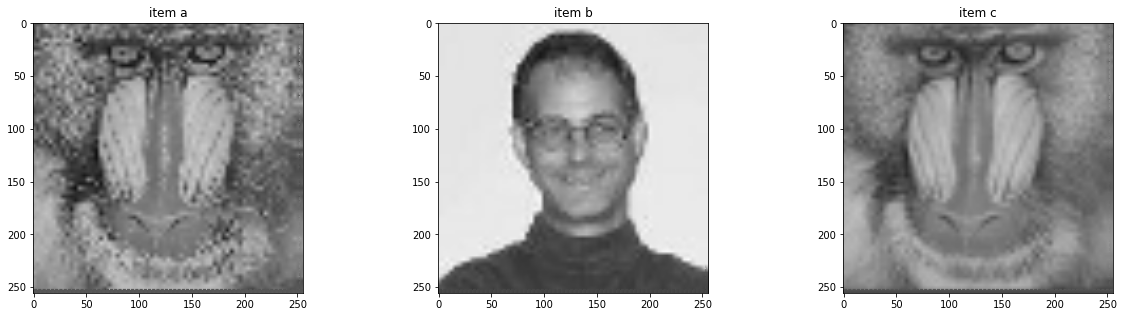

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0.5)
fig.add_subplot(1,3, 1)
plt.title("item a")
plt.imshow(item_a_resized_lineal)

fig.add_subplot(1,3, 2)
plt.title("item b")
plt.imshow(item_b_resized_lineal)

fig.add_subplot(1,3, 3)
plt.title("item c")
plt.imshow(item_c_resized_lineal)

Interpolacion bicubica



In [ ]:
item_a_resized_bicubic = InterpolateImg(item_a,"Bicubic")
item_b_resized_bicubic = InterpolateImg(item_b,"Bicubic")
item_c_resized_bicubic = InterpolateImg(item_c,"Bicubic")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


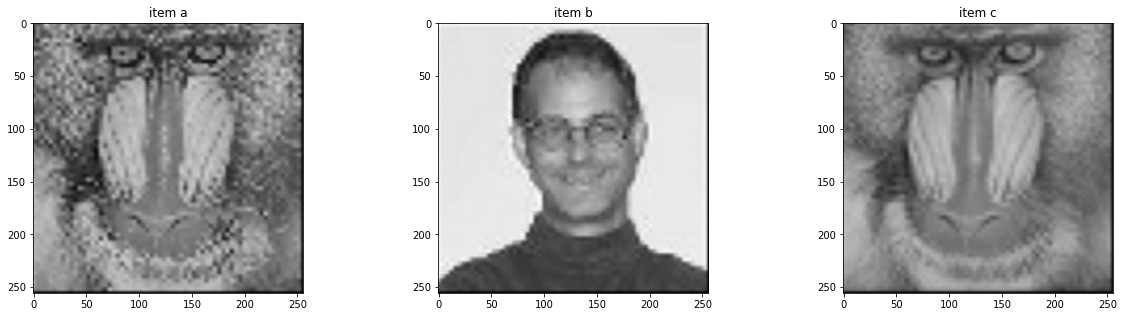

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0.5)
fig.add_subplot(1,3, 1)
plt.title("item a")
plt.imshow(item_a_resized_bicubic)

fig.add_subplot(1,3, 2)
plt.title("item b")
plt.imshow(item_b_resized_bicubic)

fig.add_subplot(1,3, 3)
plt.title("item c")
plt.imshow(item_c_resized_bicubic)

Espectro de la imagen original

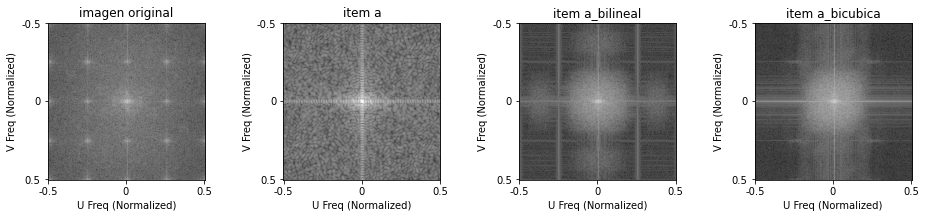

In [ ]:

#Espectro imagen original
img_spectrum = np.fft.fft2(img[:,:,0])
mag_dB = 20*np.log10(abs(img_spectrum))
mag_dB_shifted = np.fft.fftshift(mag_dB)
#Espectro imagen reducida item a
item_a_spectrum = np.fft.fft2(item_a[:,:,0],s=[256,256])
item_a_mag_dB = np.log10(np.ones(len(item_a_spectrum))+abs(item_a_spectrum ))
item_a_mag_dB_shifted = np.fft.fftshift(item_a_mag_dB)
#Espectro bilineal del item a
item_a_lineal_spectrum = np.fft.fft2(item_a_resized_lineal[:,:,0])
item_a_lineal_mag_dB = np.log10(np.ones(len(item_a_lineal_spectrum))+abs(item_a_lineal_spectrum ))
item_a_lineal_mag_dB_shifted = np.fft.fftshift(item_a_lineal_mag_dB)
#Espectro bicubica del item a
item_a_bicubic_spectrum = np.fft.fft2(item_a_resized_bicubic[:,:,0])
item_a_bicubic_mag_dB = np.log10(np.ones(len(item_a_bicubic_spectrum))+abs(item_a_bicubic_spectrum ))
item_a_bicubic_mag_dB_shifted = np.fft.fftshift(item_a_bicubic_mag_dB)

############################################
#                 GRAFICAS                 #
############################################
#concatenation = np.concatenate((mag_dB_shifted,item_a_mag_dB_shifted,item_a_lineal_mag_dB_shifted), axis=1)

#Original
plt.figure(figsize=(12,12))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0.5)

plt.subplot(141)
plt.imshow(mag_dB_shifted, cmap="gray")
plt.title("imagen original")
plt.xticks([0,127,255],[-0.5,0,0.5])
plt.yticks([0,127,255],[-0.5,0,0.5])
plt.xlabel("U Freq (Normalized)")
plt.ylabel("V Freq (Normalized)")
#Item a
plt.subplot(142)
plt.imshow(item_a_mag_dB_shifted, cmap="gray")
plt.title("item a")
plt.xticks([0,127,255],[-0.5,0,0.5])
plt.yticks([0,127,255],[-0.5,0,0.5])
plt.xlabel("U Freq (Normalized)")
plt.ylabel("V Freq (Normalized)")
#Item a bilineal
plt.subplot(143)
plt.imshow(item_a_lineal_mag_dB_shifted, cmap="gray")
plt.title("item a_bilineal")
plt.xlabel("U Freq (Normalized)")
plt.ylabel("V Freq (Normalized)")
plt.xticks([0,127,255],[-0.5,0,0.5])
plt.yticks([0,127,255],[-0.5,0,0.5])
#Item a bicubica
plt.subplot(144)
plt.imshow(item_a_bicubic_mag_dB_shifted, cmap="gray")
plt.title("item a_bicubica")
plt.xlabel("U Freq (Normalized)")
plt.ylabel("V Freq (Normalized)")
plt.xticks([0,127,255],[-0.5,0,0.5])
plt.yticks([0,127,255],[-0.5,0,0.5])

plt.show()